In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('src/silica_opt_insilico/')
from silica_opt_insilico import experiment, execute, data_processing, post_process, contour_animated
from saxs_data_processing import target_comparison
    
import numpy as np
import matplotlib.pyplot as plt

import pickle
import matplotlib.animation as animation
from IPython.display import HTML

## In silico optimization simulation

- objective functions work on volume fractions
- BO works on bounds/0-1


Ground truth:

- Diameter 80nm at [0.007, 0.018, 0.04]
- PDI min at [0.007, 0.025, 0.03]

## Parameters 

### SAXS Data processing parameters

### Experiment 'execution' parameters

In [2]:
# physical experiment bounds

teos_min_vf = 0.005
ammonia_min_vf = 0.005
water_min_vf = 0.005

teos_max_vf = 0.1
ammonia_max_vf = 0.1
water_max_vf = 0.15

noise_frac = 0.5 # what fraction of experimental noise to use

target_r_nm = 40 # particle size target

budget = 100

### Campaign structure 

### 2. Calculate scattering

In [3]:
# q range to consider up to and including spline fit step
q_min_subtract = 0.002
q_max_subtract = 0.035

# q range to interpolate spline fit on and perform distance metric calculation with
q_min_spl = 0.003
q_max_spl = 0.03
n_interpolate_gridpts = 1001 # number of grid points to interpolate q on.

In [4]:

target_r_angs = target_r_nm*10
target_pdi = 0.1
sld_silica = 8.575
sld_etoh = 9.611

In [5]:
q_grid = np.linspace(np.log10(q_min_spl), np.log10(q_max_spl), n_interpolate_gridpts)

q_grid_nonlog = 10**q_grid
target_I = target_comparison.target_intensities(q_grid_nonlog, target_r_angs, target_pdi, sld_silica, sld_etoh)
target_I = np.log10(target_I)

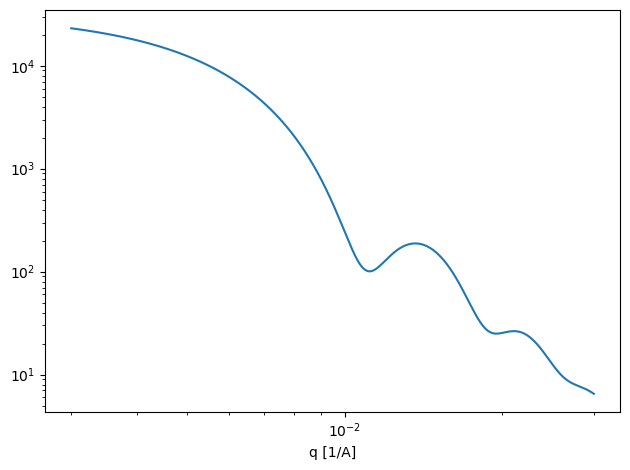

In [6]:
fig, ax = plt.subplots()
ax.loglog(10**q_grid, 10**target_I)
ax.set_xlabel('q [1/A]')

plt.tight_layout()


In [7]:
trials = {'default':{
        'batch_size':5,
        'amplitude_weight':0.1,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':0.5
        },
     'Batchsize_1':{
        'batch_size':1,
        'amplitude_weight':0.1,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':0.5
        },
     'Batchsize_10':{
        'batch_size':10,
        'amplitude_weight':0.1,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':0.5
        },
     'AmplitudeWeight_0':{
        'batch_size':5,
        'amplitude_weight':0,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':0.5
        },
     'AmplitudeWeight_0point5':{
        'batch_size':5,
        'amplitude_weight':0.5,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':0.5
        },
     'Bounds_restricted':{
        'batch_size':5,
        'amplitude_weight':0.1,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.6, 0.6, 0.6], 
        'noise_level':0.5
        },
     'NoiseLevel_1':{
        'batch_size':5,
        'amplitude_weight':0.1,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':1
        },
    'SobolBaseline':{
        'batch_size':0,
        'amplitude_weight':0.1,
        'm_samples':7,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':0.5
        },
    }

In [8]:
trials_2 = {'as_run_now':{
        'batch_size':10,
        'amplitude_weight':0.5,
        'm_samples':5,
        'lower_bounds':[0.005, 0.005, 0.005], 
        'upper_bounds':[0.1, 0.1, 0.15], 
        'noise_level':1
        }
           }

## 8. Analyze 

#### 1. Convergence plot + metrics

### 1. Find true minima for this objective function (do once per objective)

In [9]:
true_min = [6.936e-03, 2.021e-02, 4.000e-02] # for original 80nm objective

In [12]:
for 

{'as_run_now': {'batch_size': 10,
  'amplitude_weight': 0.5,
  'm_samples': 5,
  'lower_bounds': [0.005, 0.005, 0.005],
  'upper_bounds': [0.1, 0.1, 0.15],
  'noise_level': 1}}

In [19]:
data_complete, data_batches, best_distances_list, best_uuids_list, converge_iterations, best_composition_dist, name_bounds = post_process.process_distances('as_run_now', trials_2['as_run_now'], true_min)

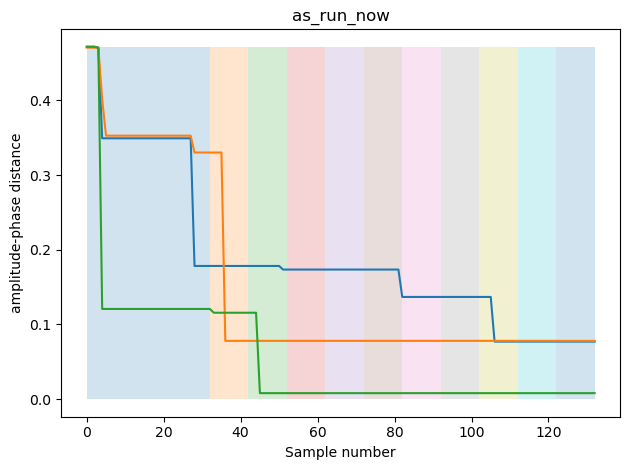

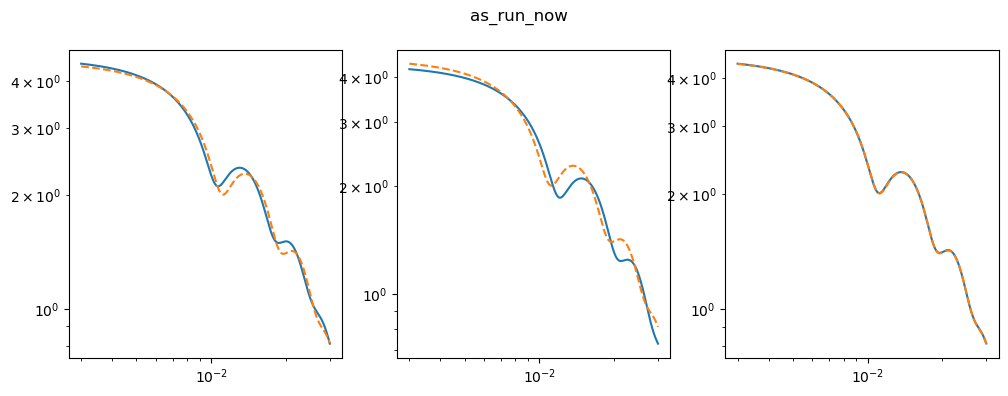

In [27]:
fig = post_process.convergence_plot(data_complete, best_distances_list, best_uuids_list, name_bounds, 'as_run_now')
best_scat = post_process.best_scatterer_plots(data_complete, best_uuids_list, q_grid_nonlog, target_I, 'as_run_now')

In [28]:
converge_iterations

['Not converged', 'Not converged', 44]

In [29]:
best_composition_dist

[0.045938525, 0.11054069, 0.014212981]

In [30]:
lower_bounds = [teos_min_vf, ammonia_min_vf, water_min_vf]
upper_bounds = [teos_max_vf, ammonia_max_vf, water_max_vf]

<function plot_phasemap.<locals>.<lambda> at 0x76ec531dbc40>
<function plot_phasemap.<locals>.<lambda> at 0x76ec519042c0>


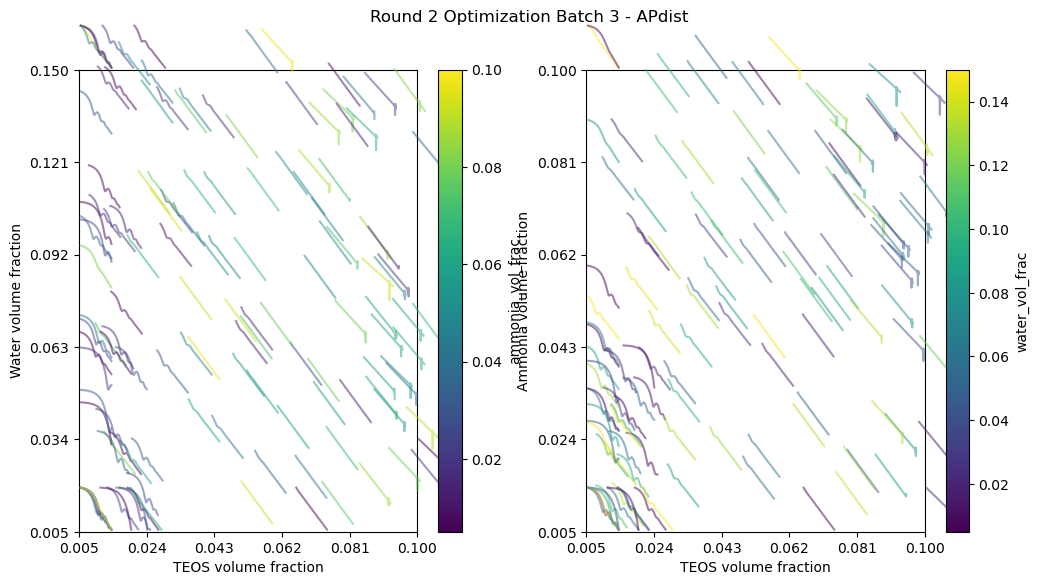

In [31]:
phased = post_process.phase_diagram(data_batches[-1], lower_bounds, upper_bounds, q_grid)

## Contour trajectory plot

In [43]:
n_grid = 50
m_samples = 5
n_batches = 10
batch_size = 10

In [35]:
with open('TEOS_water_ammoniaOptima_gridvals_80nm_ogfuncs_50.npy', 'rb') as f:
    Z_ammonia = np.load(f)

with open('TEOS_ammonia_waterOptima_gridvals_80nm_ogfuncs_50.npy', 'rb') as f:
    Z_water = np.load(f)

In [37]:
ammonia = np.linspace(ammonia_min_vf, ammonia_max_vf, n_grid)
water = np.linspace(water_min_vf, water_max_vf, n_grid)
teos = np.linspace(teos_min_vf, teos_max_vf, n_grid)

Animation saved as animation.html


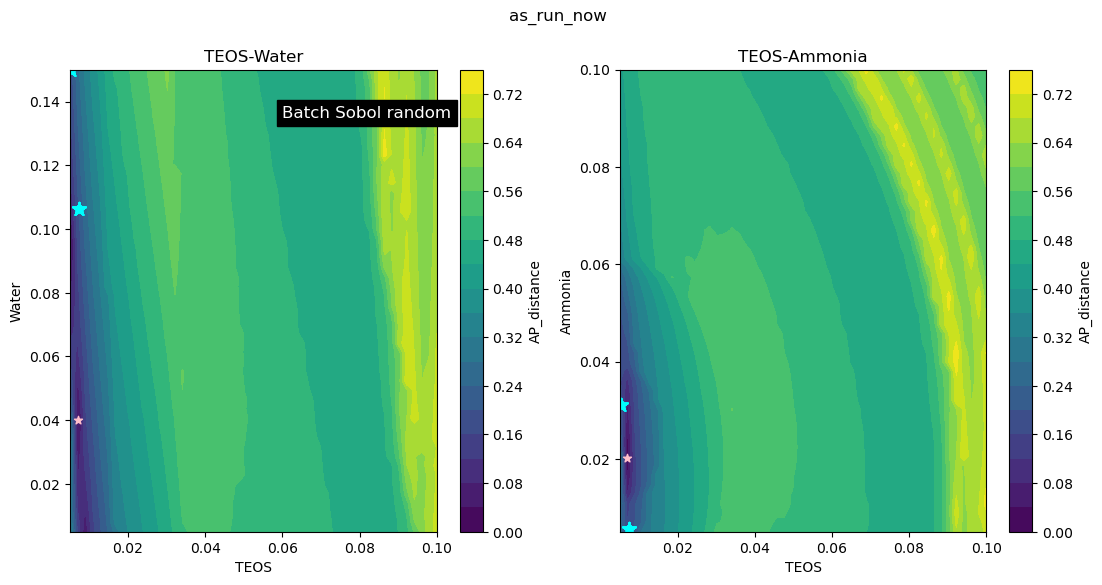

In [46]:
anim = contour_animated.ContourAnimation(ammonia, water, teos, Z_ammonia, Z_water, 
                        data_batches[-2], best_uuids_list[-2], n_batches, true_min, 'as_run_now', n_grid, m_samples, batch_size)

anim.save("animation.html", format="html")  # Saves as an HTML file